In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

####  1)The dataset

In [2]:
# unpickled_dataframe
# contains Rhein river levels from 01/01/2000 to 31/12/2012

df = pd.read_pickle("riverlevels.pandas.pickle")

In [3]:
df.shape

(455904, 15)

In [4]:
df.head()

,Andernach,Bingen,Bonn,Frankfurt Osthafen,Kalkofen Neu,Kaub,Koblenz,Koblenz Up,Mainz,Oberwinter,Oestrich,Raunheim,Rockenau Ska,Speyer,Worms
2000-01-01 00:00:00+00:00,617.0,374.0,652.0,200.0,315.0,459.0,517.0,522.0,475.0,557.0,345.0,182.0,296.0,571.0,426.0
2000-01-01 00:15:00+00:00,616.0,373.0,651.0,199.0,315.0,458.0,515.0,520.0,475.0,555.0,345.0,182.0,295.0,571.0,425.0
2000-01-01 00:30:00+00:00,615.0,373.0,650.0,198.0,314.0,458.0,514.0,517.0,475.0,555.0,344.0,180.0,296.0,570.0,425.0
2000-01-01 00:45:00+00:00,613.0,373.0,649.0,199.0,312.0,458.0,513.0,516.0,474.0,554.0,344.0,179.0,296.0,570.0,425.0
2000-01-01 01:00:00+00:00,612.0,372.0,647.0,200.0,311.0,457.0,512.0,509.0,474.0,553.0,344.0,178.0,294.0,570.0,425.0


In [5]:
df.tail()

,Andernach,Bingen,Bonn,Frankfurt Osthafen,Kalkofen Neu,Kaub,Koblenz,Koblenz Up,Mainz,Oberwinter,Oestrich,Raunheim,Rockenau Ska,Speyer,Worms
2012-12-31 22:45:00+00:00,640.0,430.0,670.0,266.0,338.0,538.0,549.0,516.0,535.0,573.0,406.0,258.0,303.0,608.0,472.0
2012-12-31 23:00:00+00:00,640.0,430.0,670.0,266.0,338.0,537.0,549.0,516.0,535.0,573.0,405.0,258.0,303.0,608.0,471.0
2012-12-31 23:15:00+00:00,639.0,428.0,669.0,265.0,337.0,537.0,548.0,515.0,534.0,572.0,405.0,258.0,303.0,608.0,471.0
2012-12-31 23:30:00+00:00,639.0,428.0,669.0,265.0,337.0,536.0,547.0,511.0,534.0,572.0,405.0,257.0,303.0,607.0,471.0
2012-12-31 23:45:00+00:00,638.0,428.0,668.0,265.0,336.0,536.0,545.0,511.0,534.0,571.0,404.0,257.0,303.0,607.0,470.0


#### Task : predict future river levels

#### 2) Preparing the data

#### Are there any "nan" values in the dataset ?

In [6]:
df.isnull().values.any()

True

In [7]:
df[df.isnull().any(axis=1)]

,Andernach,Bingen,Bonn,Frankfurt Osthafen,Kalkofen Neu,Kaub,Koblenz,Koblenz Up,Mainz,Oberwinter,Oestrich,Raunheim,Rockenau Ska,Speyer,Worms
2008-03-31 23:00:00+00:00,394.0,252.0,424.0,222.0,331.0,289.0,325.0,329.0,357.0,347.0,238.0,199.0,274.0,368.0,NaN


In [8]:
df[df.isnull().any(axis=1)].index

DatetimeIndex(['2008-03-31 23:00:00+00:00'], dtype='datetime64[ns, UTC]', freq='15T')

In [9]:
# replace the nan value by the average values of the two preceding and the two following values
df['Worms']['2008-03-31 23:00:00+00:00'] = (1/4) * ( df['Worms']['2008-03-31 22:30:00+00:00'] + 
                                                    df['Worms']['2008-03-31 22:45:00+00:00'] +
                                                    df['Worms']['2008-03-31 23:15:00+00:00'] +
                                                    df['Worms']['2008-03-31 23:30:00+00:00'] )

df['Worms']['2008-03-31 23:00:00+00:00']

230.75

In [10]:
df.isnull().values.any()

False

In [11]:
max_value = df.values.max()
min_value = df.values.min()
values_range = max_value - min_value

In [12]:
def get_train_test_set(target_city, future_timesteps) :
    
    """
    future_timesteps : the timesteps I want to predict in the future
            for example, if I want to predict 1 hour in the future then the parameter should be 4,
            since the dataset has 4 samples per hour
    """
    
    # consider all samples except for the last "future_timesteps"
    X_data = df.values[0:-future_timesteps]
    
    # as target for each sample we will set the respective city value "future_timesteps" ahead
    df_targets = df[target_city].shift(-future_timesteps) # we shift the target_city sequence by "future_timesteps" ahead
    y_data = df_targets.values[:-future_timesteps]
    
    # normalize values 
    X_data = ( X_data - min_value ) / ( values_range )
    y_data = ( y_data - min_value ) / ( values_range )
    
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.1, random_state = 0)
    
    return X_train, X_test, y_train, y_test

In [13]:
def plot_timeseries (target_city) :
    
    target_city_levels = df[target_city]
    l=np.arange(target_city_levels.size)
    %matplotlib notebook
    plt.figure()
    plt.plot(l,target_city_levels)
    plt.show()

#### 3) The model

In [14]:
def the_model (target_city, future_timesteps) :
    
    # PART 1 : TUNING HYPERPARAMETERS - check 54 different models
    
    X_train, X_test, y_train, y_test = get_train_test_set(target_city, future_timesteps)
    
    # fix dimensions to feed data into the lstm rnn
    X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))
    
    best_val_loss = 1

    for lstm_units in [128,64]:
        for hidden_dense_layers in [0,1,2]:
            for dense_units in [64,32,16]:
                for act_fct in ['linear', 'tanh','sigmoid']:

                    model = Sequential()
                    # input layer
                    model.add(LSTM(units = lstm_units, return_sequences=True, input_shape = (1,15) )) 
                    # hidden dense layers
                    if hidden_dense_layers == 1:
                        model.add(Dense(dense_units, activation = act_fct))
                    if hidden_dense_layers == 2:
                        model.add(Dense(dense_units, activation = act_fct))
                        model.add(Dense(dense_units, activation = act_fct))
                    # output layer
                    model.add(Dense(1, activation = 'linear'))

                    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

                    h = model.fit(X_train, y_train,
                                  epochs = 20, batch_size = 512,
                                validation_data = (X_test, y_test))
                    
                    tr_loss = h.history['loss'][-1]
                    val_loss = h.history['val_loss'][-1]

                    if val_loss < best_val_loss and abs(tr_loss - val_loss) < 0.01:
                        best_val_loss = val_loss
                        opt_parameters = {'lstm_units' : lstm_units,
                                            'hidden_dense_layers' : hidden_dense_layers,
                                            'dense_units' : dense_units,
                                            'act_fct' : act_fct}
                        
    print('******************************************************************************************************************')
    print('******************************************************************************************************************')
    
    print('the final model is the one with : ', opt_parameters)

    # PART 2 : THE FINAL/OPTIMAL MODEL
    
    #construction
    model = Sequential()
    # input layer
    model.add(LSTM(units = opt_parameters['lstm_units'] , return_sequences=True, input_shape = (1,15) )) 
    # hidden dense layers
    if opt_parameters['hidden_dense_layers'] == 1:
        model.add(Dense(opt_parameters['dense_units'], activation = act_fct))
    if opt_parameters['hidden_dense_layers'] == 2:
        model.add(Dense(opt_parameters['dense_units'], activation = opt_parameters['act_fct']))
        model.add(Dense(opt_parameters['dense_units'], activation = opt_parameters['act_fct']))
    # output layer
    model.add(Dense(1, activation = 'linear'))

    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    model.summary()
    
    #training on the whole dataset
    h = model.fit(X_train, y_train,
           epochs = 40, batch_size = 512,
                 validation_data = (X_test, y_test))
    
    #plot the learning curve
    %matplotlib notebook
    plt.figure()
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.legend(['train loss', 'test loss'])
    plt.show()
    
    return opt_parameters, model

#### 4) Predictions

**Remark : We see that training the model depends on the y_data and consequently on the future time steps. This means that each time we want to make a different prediction we must train the model on different dataset.** 

In [15]:
def predict(target_city) :
    
    # 
    most_recent_sample_point = df.values[-1]
    column = df.columns.get_loc(target_city)
    last_observed_city_level = most_recent_sample_point[column]
    
    # normalize
    norm_most_recent_sample_point = (most_recent_sample_point - min_value) / ( values_range)
    
    # normalized prediction
    norm_most_recent_sample_point = np.reshape(norm_most_recent_sample_point, (1,1,15))
    norm_prediction = the_model[1].predict(norm_most_recent_sample_point)
    
    # un-normalized prediction
    unnorm_prediction = norm_prediction * values_range + min_value
    
    all_results = {'last_observed_city_level' : last_observed_city_level,
               'the_prediction' : unnorm_prediction}
    
    return  all_results

#### An example

Here we predict the river level in the city of Mainz 12 hours (48 timesteps) into the future.

In [16]:
target_city = 'Mainz'
future_timesteps = 48

<IPython.core.display.Javascript object>


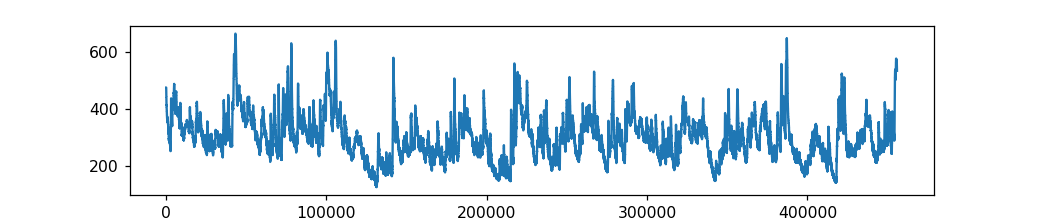

In [21]:
# zoomed plot
plot_timeseries('Mainz')

Train on 410270 samples, validate on 45586 samples
Epoch 1/20
410270/410270 [==============================] - 12s 30us/sample - loss: 0.0013 - val_loss: 7.6850e-05
Epoch 2/20
410270/410270 [==============================] - 9s 21us/sample - loss: 5.7048e-05 - val_loss: 4.1824e-05
Epoch 3/20
410270/410270 [==============================] - 7s 18us/sample - loss: 3.5537e-05 - val_loss: 3.2118e-05
Epoch 4/20
410270/410270 [==============================] - 7s 17us/sample - loss: 3.0241e-05 - val_loss: 3.0732e-05
Epoch 5/20
410270/410270 [==============================] - 7s 17us/sample - loss: 2.8631e-05 - val_loss: 2.7738e-05
Epoch 6/20
410270/410270 [==============================] - 8s 19us/sample - loss: 2.7547e-05 - val_loss: 2.7127e-05
Epoch 7/20
410270/410270 [==============================] - 7s 18us/sample - loss: 2.6602e-05 - val_loss: 2.6845e-05
Epoch 8/20
410270/410270 [==============================] - 8s 18us/sample - loss: 2.6047e-05 - val_loss: 2.7311e-05
Epoch 9/20
41027

410270/410270 [==============================] - 8s 19us/sample - loss: 2.5485e-05 - val_loss: 2.4094e-05
Epoch 10/20
410270/410270 [==============================] - 8s 20us/sample - loss: 2.4542e-05 - val_loss: 2.3799e-05
Epoch 11/20
410270/410270 [==============================] - 7s 18us/sample - loss: 2.4692e-05 - val_loss: 3.0384e-05
Epoch 12/20
410270/410270 [==============================] - 8s 20us/sample - loss: 2.4201e-05 - val_loss: 2.6494e-05
Epoch 13/20
410270/410270 [==============================] - 9s 21us/sample - loss: 2.4748e-05 - val_loss: 2.8236e-05
Epoch 14/20
410270/410270 [==============================] - 9s 21us/sample - loss: 2.4045e-05 - val_loss: 2.3393e-05
Epoch 15/20
410270/410270 [==============================] - 8s 20us/sample - loss: 2.4158e-05 - val_loss: 2.3220e-05
Epoch 16/20
410270/410270 [==============================] - 8s 20us/sample - loss: 2.3713e-05 - val_loss: 2.5283e-05
Epoch 17/20
410270/410270 [==============================] - 8s 18us

410270/410270 [==============================] - 9s 21us/sample - loss: 2.3967e-05 - val_loss: 2.3003e-05
Epoch 18/20
410270/410270 [==============================] - 9s 21us/sample - loss: 2.4093e-05 - val_loss: 2.2953e-05
Epoch 19/20
410270/410270 [==============================] - 9s 22us/sample - loss: 2.3591e-05 - val_loss: 2.5549e-05
Epoch 20/20
410270/410270 [==============================] - 9s 22us/sample - loss: 2.3860e-05 - val_loss: 2.2858e-05
Train on 410270 samples, validate on 45586 samples
Epoch 1/20
410270/410270 [==============================] - 9s 23us/sample - loss: 7.5277e-04 - val_loss: 6.2177e-05
Epoch 2/20
410270/410270 [==============================] - 7s 18us/sample - loss: 4.5867e-05 - val_loss: 3.5064e-05
Epoch 3/20
410270/410270 [==============================] - 8s 19us/sample - loss: 3.2215e-05 - val_loss: 3.0887e-05
Epoch 4/20
410270/410270 [==============================] - 8s 19us/sample - loss: 2.9675e-05 - val_loss: 2.8721e-05
Epoch 5/20
410270/410

410270/410270 [==============================] - 9s 22us/sample - loss: 2.7061e-05 - val_loss: 2.5195e-05
Epoch 6/20
410270/410270 [==============================] - 9s 22us/sample - loss: 2.7194e-05 - val_loss: 2.9060e-05
Epoch 7/20
410270/410270 [==============================] - 8s 20us/sample - loss: 2.6976e-05 - val_loss: 2.6429e-05
Epoch 8/20
410270/410270 [==============================] - 8s 19us/sample - loss: 2.6904e-05 - val_loss: 2.4761e-05
Epoch 9/20
410270/410270 [==============================] - 8s 20us/sample - loss: 2.5807e-05 - val_loss: 2.3893e-05
Epoch 10/20
410270/410270 [==============================] - 9s 22us/sample - loss: 2.6317e-05 - val_loss: 2.3529e-05
Epoch 11/20
410270/410270 [==============================] - 8s 19us/sample - loss: 2.6234e-05 - val_loss: 2.8172e-05
Epoch 12/20
410270/410270 [==============================] - 8s 20us/sample - loss: 2.5551e-05 - val_loss: 2.4403e-05
Epoch 13/20
410270/410270 [==============================] - 10s 24us/sa

410270/410270 [==============================] - 9s 22us/sample - loss: 2.5424e-05 - val_loss: 2.3186e-05
Epoch 14/20
410270/410270 [==============================] - 9s 22us/sample - loss: 2.4662e-05 - val_loss: 2.3758e-05
Epoch 15/20
410270/410270 [==============================] - 8s 19us/sample - loss: 2.5944e-05 - val_loss: 2.9364e-05
Epoch 16/20
410270/410270 [==============================] - 8s 20us/sample - loss: 2.4830e-05 - val_loss: 2.4018e-05
Epoch 17/20
410270/410270 [==============================] - 8s 19us/sample - loss: 2.5002e-05 - val_loss: 2.3351e-05
Epoch 18/20
410270/410270 [==============================] - 8s 19us/sample - loss: 2.4622e-05 - val_loss: 2.6727e-05
Epoch 19/20
410270/410270 [==============================] - 8s 20us/sample - loss: 2.4817e-05 - val_loss: 2.3155e-05
Epoch 20/20
410270/410270 [==============================] - 9s 21us/sample - loss: 2.4560e-05 - val_loss: 2.2946e-05
Train on 410270 samples, validate on 45586 samples
Epoch 1/20
410270

410270/410270 [==============================] - 9s 23us/sample - loss: 2.3873e-04 - val_loss: 3.3804e-05
Epoch 2/20
410270/410270 [==============================] - 8s 20us/sample - loss: 3.1229e-05 - val_loss: 2.9391e-05
Epoch 3/20
410270/410270 [==============================] - 8s 20us/sample - loss: 2.9122e-05 - val_loss: 2.7035e-05
Epoch 4/20
410270/410270 [==============================] - 8s 21us/sample - loss: 2.7496e-05 - val_loss: 3.0662e-05
Epoch 5/20
410270/410270 [==============================] - 8s 19us/sample - loss: 2.6285e-05 - val_loss: 2.5090e-05
Epoch 6/20
410270/410270 [==============================] - 8s 20us/sample - loss: 2.6076e-05 - val_loss: 2.6524e-05
Epoch 7/20
410270/410270 [==============================] - 8s 20us/sample - loss: 2.5811e-05 - val_loss: 2.4655e-05
Epoch 8/20
410270/410270 [==============================] - 9s 22us/sample - loss: 2.5098e-05 - val_loss: 2.4510e-05
Epoch 9/20
410270/410270 [==============================] - 8s 21us/sample 

410270/410270 [==============================] - 9s 21us/sample - loss: 3.3392e-05 - val_loss: 2.6833e-05
Epoch 10/20
410270/410270 [==============================] - 9s 21us/sample - loss: 3.6355e-05 - val_loss: 2.6367e-05
Epoch 11/20
410270/410270 [==============================] - 9s 21us/sample - loss: 3.3179e-05 - val_loss: 3.8082e-05
Epoch 12/20
410270/410270 [==============================] - 9s 21us/sample - loss: 3.4741e-05 - val_loss: 2.7271e-05
Epoch 13/20
410270/410270 [==============================] - 9s 22us/sample - loss: 3.3245e-05 - val_loss: 5.7043e-05
Epoch 14/20
410270/410270 [==============================] - 10s 25us/sample - loss: 3.3380e-05 - val_loss: 2.6203e-05
Epoch 15/20
410270/410270 [==============================] - 10s 23us/sample - loss: 3.2812e-05 - val_loss: 2.4957e-05
Epoch 16/20
410270/410270 [==============================] - 9s 21us/sample - loss: 3.2883e-05 - val_loss: 3.2517e-05
Epoch 17/20
410270/410270 [==============================] - 9s 21

410270/410270 [==============================] - 8s 20us/sample - loss: 2.7566e-05 - val_loss: 2.9144e-05
Epoch 18/20
410270/410270 [==============================] - 8s 20us/sample - loss: 2.7283e-05 - val_loss: 2.6727e-05
Epoch 19/20
410270/410270 [==============================] - 8s 21us/sample - loss: 2.7070e-05 - val_loss: 2.6376e-05
Epoch 20/20
410270/410270 [==============================] - 9s 21us/sample - loss: 2.7137e-05 - val_loss: 3.6635e-05
Train on 410270 samples, validate on 45586 samples
Epoch 1/20
410270/410270 [==============================] - 9s 23us/sample - loss: 7.5721e-04 - val_loss: 4.0193e-05
Epoch 2/20
410270/410270 [==============================] - 8s 19us/sample - loss: 3.2768e-05 - val_loss: 2.9371e-05
Epoch 3/20
410270/410270 [==============================] - 8s 20us/sample - loss: 2.8870e-05 - val_loss: 2.9240e-05
Epoch 4/20
410270/410270 [==============================] - 8s 20us/sample - loss: 2.7632e-05 - val_loss: 2.6682e-05
Epoch 5/20
410270/410

410270/410270 [==============================] - 4s 9us/sample - loss: 3.3000e-05 - val_loss: 3.1866e-05
Epoch 6/20
410270/410270 [==============================] - 4s 9us/sample - loss: 3.1122e-05 - val_loss: 3.0968e-05
Epoch 7/20
410270/410270 [==============================] - 4s 9us/sample - loss: 2.9116e-05 - val_loss: 2.8236e-05
Epoch 8/20
410270/410270 [==============================] - 4s 10us/sample - loss: 2.7813e-05 - val_loss: 2.8207e-05
Epoch 9/20
410270/410270 [==============================] - 4s 9us/sample - loss: 2.6612e-05 - val_loss: 2.6462e-05
Epoch 10/20
410270/410270 [==============================] - 4s 10us/sample - loss: 2.5726e-05 - val_loss: 2.9602e-05
Epoch 11/20
410270/410270 [==============================] - 5s 11us/sample - loss: 2.5465e-05 - val_loss: 2.7705e-05
Epoch 12/20
410270/410270 [==============================] - 4s 9us/sample - loss: 2.4583e-05 - val_loss: 2.4976e-05
Epoch 13/20
410270/410270 [==============================] - 4s 9us/sample - 

Epoch 14/20
410270/410270 [==============================] - 5s 12us/sample - loss: 2.4061e-05 - val_loss: 2.4091e-05
Epoch 15/20
410270/410270 [==============================] - 5s 12us/sample - loss: 2.3947e-05 - val_loss: 2.3113e-05
Epoch 16/20
410270/410270 [==============================] - 5s 12us/sample - loss: 2.3959e-05 - val_loss: 2.3010e-05
Epoch 17/20
410270/410270 [==============================] - 5s 12us/sample - loss: 2.3810e-05 - val_loss: 2.3390e-05
Epoch 18/20
410270/410270 [==============================] - 6s 15us/sample - loss: 2.3531e-05 - val_loss: 2.5899e-05
Epoch 19/20
410270/410270 [==============================] - 5s 13us/sample - loss: 2.3536e-05 - val_loss: 2.2872e-05
Epoch 20/20
410270/410270 [==============================] - 5s 13us/sample - loss: 2.3693e-05 - val_loss: 2.2959e-05
Train on 410270 samples, validate on 45586 samples
Epoch 1/20
410270/410270 [==============================] - 7s 16us/sample - loss: 0.0011 - val_loss: 7.9081e-05
Epoch 2/20

410270/410270 [==============================] - 5s 12us/sample - loss: 6.5173e-05 - val_loss: 4.8800e-05
Epoch 3/20
410270/410270 [==============================] - 5s 12us/sample - loss: 4.0037e-05 - val_loss: 3.5194e-05
Epoch 4/20
410270/410270 [==============================] - 5s 12us/sample - loss: 3.3193e-05 - val_loss: 3.1725e-05
Epoch 5/20
410270/410270 [==============================] - 5s 12us/sample - loss: 3.0558e-05 - val_loss: 2.9633e-05
Epoch 6/20
410270/410270 [==============================] - 5s 13us/sample - loss: 2.8796e-05 - val_loss: 2.7822e-05
Epoch 7/20
410270/410270 [==============================] - 5s 12us/sample - loss: 2.7452e-05 - val_loss: 2.7159e-05
Epoch 8/20
410270/410270 [==============================] - 5s 12us/sample - loss: 2.6280e-05 - val_loss: 2.7667e-05
Epoch 9/20
410270/410270 [==============================] - 5s 13us/sample - loss: 2.5381e-05 - val_loss: 2.5048e-05
Epoch 10/20
410270/410270 [==============================] - 5s 12us/sample

410270/410270 [==============================] - 6s 15us/sample - loss: 2.6129e-05 - val_loss: 2.4003e-05
Epoch 11/20
410270/410270 [==============================] - 6s 15us/sample - loss: 2.6373e-05 - val_loss: 2.3615e-05
Epoch 12/20
410270/410270 [==============================] - 8s 20us/sample - loss: 2.5698e-05 - val_loss: 2.6869e-05
Epoch 13/20
410270/410270 [==============================] - 7s 17us/sample - loss: 2.5638e-05 - val_loss: 2.8613e-05
Epoch 14/20
410270/410270 [==============================] - 7s 17us/sample - loss: 2.5547e-05 - val_loss: 2.5290e-05
Epoch 15/20
410270/410270 [==============================] - 7s 18us/sample - loss: 2.5246e-05 - val_loss: 2.3969e-05
Epoch 16/20
410270/410270 [==============================] - 8s 19us/sample - loss: 2.5279e-05 - val_loss: 3.0694e-05
Epoch 17/20
410270/410270 [==============================] - 6s 15us/sample - loss: 2.5239e-05 - val_loss: 2.3278e-05
Epoch 18/20
410270/410270 [==============================] - 6s 15us

410270/410270 [==============================] - 7s 18us/sample - loss: 2.3959e-05 - val_loss: 2.2490e-05
Epoch 19/20
410270/410270 [==============================] - 7s 18us/sample - loss: 2.3918e-05 - val_loss: 2.3446e-05
Epoch 20/20
410270/410270 [==============================] - 5s 13us/sample - loss: 2.3807e-05 - val_loss: 2.7789e-05
Train on 410270 samples, validate on 45586 samples
Epoch 1/20
410270/410270 [==============================] - 7s 17us/sample - loss: 0.0154 - val_loss: 1.4345e-04
Epoch 2/20
410270/410270 [==============================] - 6s 14us/sample - loss: 9.2043e-05 - val_loss: 6.4651e-05
Epoch 3/20
410270/410270 [==============================] - 7s 16us/sample - loss: 5.3618e-05 - val_loss: 4.4634e-05
Epoch 4/20
410270/410270 [==============================] - 6s 15us/sample - loss: 3.9708e-05 - val_loss: 3.6392e-05
Epoch 5/20
410270/410270 [==============================] - 7s 17us/sample - loss: 3.4695e-05 - val_loss: 3.3272e-05
Epoch 6/20
410270/410270 [

410270/410270 [==============================] - 6s 15us/sample - loss: 3.5596e-05 - val_loss: 3.4435e-05
Epoch 7/20
410270/410270 [==============================] - 6s 15us/sample - loss: 3.3383e-05 - val_loss: 3.2361e-05
Epoch 8/20
410270/410270 [==============================] - 6s 14us/sample - loss: 3.1142e-05 - val_loss: 3.0263e-05
Epoch 9/20
410270/410270 [==============================] - 6s 14us/sample - loss: 2.9339e-05 - val_loss: 2.8559e-05
Epoch 10/20
410270/410270 [==============================] - 6s 14us/sample - loss: 2.8182e-05 - val_loss: 2.7840e-05
Epoch 11/20
410270/410270 [==============================] - 5s 13us/sample - loss: 2.7446e-05 - val_loss: 2.9899e-05
Epoch 12/20
410270/410270 [==============================] - 5s 13us/sample - loss: 2.6754e-05 - val_loss: 2.7153e-05
Epoch 13/20
410270/410270 [==============================] - 6s 15us/sample - loss: 2.6292e-05 - val_loss: 2.9018e-05
Epoch 14/20
410270/410270 [==============================] - 6s 14us/sa

410270/410270 [==============================] - 7s 16us/sample - loss: 3.5058e-05 - val_loss: 4.6887e-05
Epoch 15/20
410270/410270 [==============================] - 7s 17us/sample - loss: 3.5344e-05 - val_loss: 2.7249e-05
Epoch 16/20
410270/410270 [==============================] - 6s 16us/sample - loss: 3.5452e-05 - val_loss: 2.6185e-05
Epoch 17/20
410270/410270 [==============================] - 7s 17us/sample - loss: 3.4183e-05 - val_loss: 3.4195e-05
Epoch 18/20
410270/410270 [==============================] - 7s 17us/sample - loss: 3.5642e-05 - val_loss: 2.7437e-05
Epoch 19/20
410270/410270 [==============================] - 7s 16us/sample - loss: 3.3581e-05 - val_loss: 2.4907e-05
Epoch 20/20
410270/410270 [==============================] - 6s 16us/sample - loss: 3.4762e-05 - val_loss: 3.2910e-05
Train on 410270 samples, validate on 45586 samples
Epoch 1/20
410270/410270 [==============================] - 7s 17us/sample - loss: 5.0499e-04 - val_loss: 4.7897e-05
Epoch 2/20
410270/

410270/410270 [==============================] - 6s 15us/sample - loss: 4.7983e-05 - val_loss: 3.5092e-05
Epoch 3/20
410270/410270 [==============================] - 6s 15us/sample - loss: 3.2019e-05 - val_loss: 3.2304e-05
Epoch 4/20
410270/410270 [==============================] - 6s 15us/sample - loss: 2.9765e-05 - val_loss: 2.8353e-05
Epoch 5/20
410270/410270 [==============================] - 6s 16us/sample - loss: 2.8214e-05 - val_loss: 2.6808e-05
Epoch 6/20
410270/410270 [==============================] - 6s 15us/sample - loss: 2.7001e-05 - val_loss: 2.5382e-05
Epoch 7/20
410270/410270 [==============================] - 7s 16us/sample - loss: 2.6125e-05 - val_loss: 2.9592e-05
Epoch 8/20
410270/410270 [==============================] - 6s 15us/sample - loss: 2.5845e-05 - val_loss: 2.9177e-05
Epoch 9/20
410270/410270 [==============================] - 6s 14us/sample - loss: 2.6148e-05 - val_loss: 2.3798e-05
Epoch 10/20
410270/410270 [==============================] - 6s 14us/sample

410270/410270 [==============================] - 13s 31us/sample - loss: 0.0821 - val_loss: 1.0479e-04
Epoch 2/40
410270/410270 [==============================] - 12s 28us/sample - loss: 6.1441e-05 - val_loss: 4.3355e-05
Epoch 3/40
410270/410270 [==============================] - 11s 27us/sample - loss: 3.8310e-05 - val_loss: 3.5352e-05
Epoch 4/40
410270/410270 [==============================] - 12s 29us/sample - loss: 3.4111e-05 - val_loss: 3.3299e-05
Epoch 5/40
410270/410270 [==============================] - 12s 30us/sample - loss: 3.2166e-05 - val_loss: 3.1060e-05
Epoch 6/40
410270/410270 [==============================] - 12s 30us/sample - loss: 3.0386e-05 - val_loss: 2.9308e-05
Epoch 7/40
410270/410270 [==============================] - 13s 32us/sample - loss: 2.8771e-05 - val_loss: 2.8751e-05
Epoch 8/40
410270/410270 [==============================] - 12s 29us/sample - loss: 2.7906e-05 - val_loss: 2.8697e-05
Epoch 9/40
410270/410270 [==============================] - 12s 29us/sa

<IPython.core.display.Javascript object>


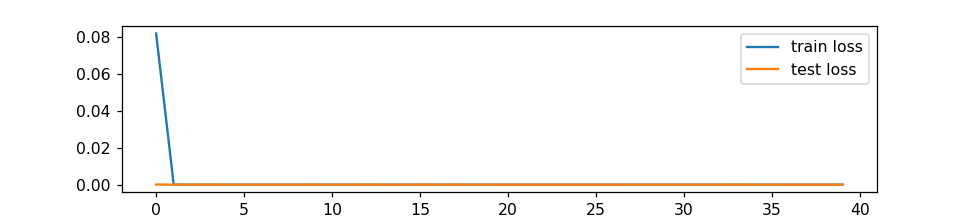

In [18]:
the_model = the_model('Mainz', 48)

In [19]:
prediction = predict('Mainz')

In [20]:
print('last observed value is ', prediction['last_observed_city_level'])
print('the prediction for ', future_timesteps, ' steps ahead is ', prediction['the_prediction'])

last observed value is  534.0
the prediction for  48  steps ahead is  [[[510.89203]]]
